In [ ]:
Notebook to get and clean the data of La Vanguardia newspaper about covid19 vaccination

In [1]:
from helpers import *

In [2]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
There is no [linux64] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/97.0.4692.71]
/tmp/ipykernel_188095/1010004176.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [35]:
# def login(): 
#     driver.find_element_by_xpath('/html/body/div[1]/header/div[1]/div/div/div/div[3]/ul/li[1]/a').click()
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[1]/input').send_keys(email)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[2]/input').send_keys(password)
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[3]/input').click()

In [37]:
def get_links_VANGUARDIA(search_URL): 
    list_links=[]
    driver.get(search_URL)
    while True: 
        links = driver.find_elements_by_xpath('//h2/a')
        for i in links: 
            list_links.append(i.get_attribute('href'))
        try :
            next = driver.find_element_by_xpath('//*[@id="results"]/ul/li[3]/a/span')
            time.sleep(5)
            next.click()
            
        except :
            print("No more pages left")
            break
    return list_links

In [56]:
from newspaper import Article
from newspaper import fulltext
import requests

In [44]:
def get_html_la_vanguardia(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/LAVANGUARDIA/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
#

In [49]:
def get_html_la_vanguardia2020(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/LAVANGUARDIA2020/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')

In [10]:
articles_vacunacion_la_vanguardia = pd.DataFrame.from_dict(list_articles_vacunacion_la_vanguardia)
articles_vacunacion_la_vanguardia

,Title,Subheadline,Text,Authors,Date,Link
0,AstraZeneca vuelve a España a partir del miérc...,El Ministerio de Sanidad decide darle una segu...,La Agencia Europea del Medicamento ha bendecid...,error,19/03/2021 07:08,https://www.lavanguardia.com/vida/20210319/660...
1,Illa no permite a las comunidades ampliar el t...,El siguiente grupo que se vacunará a partir de...,"Ni cogobernanza, ni estrategia consensuada. E...",error,20/01/2021 18:59,https://www.lavanguardia.com/vida/20210120/618...
2,Hoy sea reanuda la campaña de vacunación con A...,La Agencia Europea de Medicamentos ha estipula...,El Ministerio de Sanidad vuelve a utilizar hoy...,error,24/03/2021 07:13,https://www.lavanguardia.com/vida/20210324/660...
3,Ontario sugiere utilizar solo una dosis de la ...,"Toronto (Canadá), 29 dic (EFE).- El responsabl...","Toronto (Canadá), 29 dic (EFE).- El responsabl...",error,29/12/2020 19:25,https://www.lavanguardia.com/vida/20201229/615...
4,Hasta 600.000 dosis de Moderna antes del 20 de...,Las 35.700 que llegaron ayer se repartirán a l...,España cuenta desde ayer con 35.700 dosis de l...,error,13/01/2021 03:11,https://www.lavanguardia.com/vida/20210113/618...
...,...,...,...,...,...,...
5820,"Liquidez, turismo y covid",error,Las últimas cifras sobre coyuntura turística p...,error,27/08/2021 00:05,https://www.lavanguardia.com/economia/20210827...
5821,"¿Que países podremos visitar, o no, en estas v...",El mundo se divide en tres bloques: los destin...,¿Pensando en un destino para las vacaciones? E...,error,13/06/2021 00:05,https://www.lavanguardia.com/vida/20210613/752...
5822,Comienza la campaña de vacunación frente al CO...,"El alcalde de Murcia, José Ballesta, aseguró e...","MURCIA, 27 (EUROPA PRESS) El alcalde de Murcia...",error,27/12/2020 17:35,https://www.lavanguardia.com/local/murcia/2020...
5823,Pulso al Gobierno por el uso de la mascarilla ...,El Congreso decide hoy si convalida el decreto...,Con los contagios desbocados y con las comunid...,error,21/07/2021 00:00,https://www.lavanguardia.com/vida/20210721/761...


In [1]:
# Store the list in a document
with open("list_links_vacunacion_LAVANGUARDIA.txt", 'w') as f:
    for s in list_links_vanguardia:
        f.write(str(s) + '\n')

In [28]:
list_links_vanguardia=get_links_VANGUARDIA('https://stories.lavanguardia.com/search?q=vacunacion&author=&category=&section=&startDate=01%2F01%2F2020&endDate=31%2F10%2F2021&sort=')

No more pages left


In [109]:
len(list_links_vanguardia)

5825

In [ ]:
# PROBAMOS ESTO OTRA VEZ PARA EL AÑO 2020

In [38]:
list_links_vanguardia=get_links_VANGUARDIA('https://stories.lavanguardia.com/search?q=vacunacion&author=&category=&section=&startDate=01%2F01%2F2020&endDate=31%2F12%2F2020&sort=date%3Aasc')

No more pages left


In [39]:
len(list_links_vanguardia)

1017

In [30]:
# Store the list in a document
with open("list_links_vacunacion_LAVANGUARDIA.txt", 'w') as f:
    for s in list_links_vanguardia:
        f.write(str(s) + '\n')

In [40]:
with open("list_links_vacunacion_LAVANGUARDIA_2020.txt", 'w') as f:
    for s in list_links_vanguardia:
        f.write(str(s) + '\n')

In [41]:
with open("list_links_vacunacion_LAVANGUARDIA_2020.txt", 'r') as f:
    list_links_vanguardia2020 = [line.rstrip('\n') for line in f]
    list_links_vanguardia2020= list(set(list_links_vanguardia2020))
len(list_links_vanguardia2020)

1017

In [123]:
get_html_la_vanguardia(list_links_vanguardia)

In [51]:
get_html_la_vanguardia2020(list_links_vanguardia2020)

In [3]:
import os
list_articles_vacunacion_la_vanguardia2021=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/LAVANGUARDIA/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/LAVANGUARDIA/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1", class_="title").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='author-name').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find("h2", class_="epigraph").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find("time").text
    except: 
        date="error"
    try:
        tf= soup.find(class_="article-modules").find_all("p",attrs={'class': 'paragraph'})
        for p in tf:
            list_text.append(p.get_text())
        text=' '.join(list_text)
    except: 
        text= "error"
    list_articles_vacunacion_la_vanguardia2021.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
import os
list_articles_vacunacion_la_vanguardia2020=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/LAVANGUARDIA2020/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/LAVANGUARDIA2020/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1", class_="title").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='author-name').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find("h2", class_="epigraph").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find("time").text
    except: 
        date="error"
    try:
        tf= soup.find(class_="article-modules").find_all("p",attrs={'class': 'paragraph'})
        for p in tf:
            list_text.append(p.get_text())
        text=' '.join(list_text)
    except: 
        text= "error"
    list_articles_vacunacion_la_vanguardia2020.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [5]:
list_articles_vacunacion_la_vanguardia=list_articles_vacunacion_la_vanguardia2020 + list_articles_vacunacion_la_vanguardia2021

In [6]:
articles_LAVANGUARDIA = pd.DataFrame.from_dict(list_articles_vacunacion_la_vanguardia)

In [7]:
#articles contains at least in the title, subheadline or Text the word vacun...
articles_LAVANGUARDIA=articles_LAVANGUARDIA[articles_LAVANGUARDIA.Text.str.contains("vacun")|articles_LAVANGUARDIA.Title.str.contains("vacun")|articles_LAVANGUARDIA.Subheadline.str.contains("vacun")]

In [8]:
#Drop duplicates
articles_LAVANGUARDIA=articles_LAVANGUARDIA.drop_duplicates()

In [9]:
articles_LAVANGUARDIA['Text'] = articles_LAVANGUARDIA['Text'].apply(preprocessor)
articles_LAVANGUARDIA['Title'] = articles_LAVANGUARDIA['Title'].apply(preprocessor)
articles_LAVANGUARDIA['n_words'] = articles_LAVANGUARDIA.Text.apply(lambda x: len(str(x).split(' ')))

In [10]:
articles_LAVANGUARDIA['Newspaper']='LA VANGUARDIA'
articles_LAVANGUARDIA['Country']='Spain'

In [11]:
articles_LAVANGUARDIA=articles_LAVANGUARDIA.drop(articles_LAVANGUARDIA[articles_LAVANGUARDIA['n_words']<50].index, inplace=False)

In [12]:
articles_LAVANGUARDIA

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
0,El caótico funeral de Maradona desgasta la fig...,El presidente peronista cumple la semana que v...,Alberto Fernández cumple la semana que viene u...,Robert Mur | Buenos AiresArgentina. Corresponsal,05/12/2020 06:00,https://www.lavanguardia.com/internacional/202...,846,LA VANGUARDIA,Spain
1,Sánchez visita la subcontrata de Moderna en Ma...,El presidente del Gobierno ha apelado a la cie...,"Pedro Sánchez, presidente del Gobierno en Esp...",Redacción,26/11/2020 18:18,https://www.lavanguardia.com/politica/20201126...,108,LA VANGUARDIA,Spain
3,Próximas estaciones de la política española: B...,Militares retirados dan a conocer otro manifie...,Prácticamente aprobados los presupuestos gener...,Enric JulianaMadrid,06/12/2020 00:06,https://www.lavanguardia.com/politica/20201206...,1944,LA VANGUARDIA,Spain
4,Una vacuna contra el Covid-19,error,Imaginemos por un momento que esta situación q...,error,05/03/2020 01:19,https://www.lavanguardia.com/vida/20200305/473...,363,LA VANGUARDIA,Spain
5,Plan de vacunación y restricciones en Andalucí...,Andalucía suma 1.714 casos de coronavirus dete...,Las comunidades autónomas de España se prepara...,Redacción,31/12/2020 15:54,https://www.lavanguardia.com/vida/20201231/616...,277,LA VANGUARDIA,Spain
...,...,...,...,...,...,...,...,...,...
6804,Australia quiere mantener sus fronteras cerrad...,"""No sabemos si (la vacuna) prevendrá la transm...",Australia apuesta por mantener sus fronteras c...,EFE /Sídney (Australia),18/01/2021 09:49,https://www.lavanguardia.com/internacional/202...,437,LA VANGUARDIA,Spain
6806,Faconauto pide ayudas para evitar más despidos,La facturación baja un 19% y se han destruido ...,Nuevo llamamiento del sector de automoción al ...,Pilar Blázquez,16/02/2021 00:36,https://www.lavanguardia.com/economia/20210216...,519,LA VANGUARDIA,Spain
6809,Boris Johnson defiende las dosis de AstraZenec...,El primer ministro británico apuesta por la va...,"El primer ministro británico, Boris Johnson, h...",Europa Press,17/03/2021 18:20,https://www.lavanguardia.com/internacional/202...,557,LA VANGUARDIA,Spain
6810,La vacunación recibirá un nuevo impulso en agosto,El anuncio de Sánchez quiere avanzar la inmuni...,La vacunación contra la covid se acelerará de ...,Marta Ricart,31/07/2021 06:00,https://www.lavanguardia.com/vida/20210731/763...,1059,LA VANGUARDIA,Spain


In [13]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_LAVANGUARDIA.iterrows(): 
    try:
        articles_LAVANGUARDIA['Date'][index] =datetime.strptime(articles_LAVANGUARDIA['Date'][index], '%d/%m/%Y %H:%M').date()
    except: 
        continue

/tmp/ipykernel_188095/3787515356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_LAVANGUARDIA['Date'][index] =datetime.strptime(articles_LAVANGUARDIA['Date'][index], '%d/%m/%Y %H:%M').date()


In [14]:
articles_LAVANGUARDIA.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
470,"Más de 6.000 muertos, la mayoría niños, por un...",En el último año se han declarado 310.000 nuev...,El brote de sarampión declarado en la Repúblic...,EFEKinshasa,2020-01-07,https://www.lavanguardia.com/internacional/202...,460,LA VANGUARDIA,Spain
385,Los avances en salud dependen de la colaboración,Directivos de farmacéuticas aseguran que todos...,El sector de la salud está viviendo una transf...,Enric Freire,2020-01-11,https://www.lavanguardia.com/economia/20200111...,1443,LA VANGUARDIA,Spain
897,Muere en Cádiz un niño de 3 años de Ceuta ingr...,El menor fue trasladado desde la ciudad autóno...,Un niño de tres años de edad ingresado en el H...,Agencias,2020-01-12,https://www.lavanguardia.com/vida/20200112/472...,304,LA VANGUARDIA,Spain
963,La gripe comienza a tomar fuerza en España,Durante la primera semana de este 2020 se ha r...,"Con 54,6 casos por 100.000 habitantes, la grip...",EFEMadrid,2020-01-13,https://www.lavanguardia.com/vida/20200113/472...,674,LA VANGUARDIA,Spain
785,Viaje a destinos de alturas; qué hacer y cómo ...,Cinco consejos prácticos para combatir el mal ...,Existen múltiples lugares en el mundo cuyos ve...,Antònia JustíciaBarcelona,2020-01-30,https://www.lavanguardia.com/ocio/viajes/20200...,602,LA VANGUARDIA,Spain
...,...,...,...,...,...,...,...,...,...
3354,Jon Bon Jovi cancela su concierto poco antes d...,"El público, que ya había entrado al recinto, f...",Aunque poco a poco los casos de covid han ido ...,Lorena Montón,2021-10-31,https://www.lavanguardia.com/gente/20211031/78...,350,LA VANGUARDIA,Spain
4577,"Luis Enjuanes, el padre de la vacuna española ...",Este reconocido virólogo lidera desde el Centr...,Un sencillo y práctico espray inhalador y una ...,Anna Tomàs,2021-10-31,https://www.lavanguardia.com/magazine/personal...,1062,LA VANGUARDIA,Spain
5958,China advierte que su brote de covid deja una ...,La Comisión Nacional de Sanidad del país alert...,"El actual rebrote de coronavirus en China, que...",EFE,2021-10-31,https://www.lavanguardia.com/internacional/202...,425,LA VANGUARDIA,Spain
4503,El espíritu de Nueva York sobrevive a la Covid,Fue la primera ciudad que exigió una prueba de...,* El autor forma parte de la comunidad de lect...,Joan Soldevila Adán,2021-10-31,https://www.lavanguardia.com/participacion/las...,188,LA VANGUARDIA,Spain


In [15]:
articles_LAVANGUARDIA.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_la_vanguardia_30_11_21.csv', index = False)

In [16]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_la_vanguardia_30_11_21.csv')

In [17]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
409,"Más de 6.000 muertos, la mayoría niños, por un...",En el último año se han declarado 310.000 nuev...,El brote de sarampión declarado en la Repúblic...,EFEKinshasa,2020-01-07,https://www.lavanguardia.com/internacional/202...,460,LA VANGUARDIA,Spain
337,Los avances en salud dependen de la colaboración,Directivos de farmacéuticas aseguran que todos...,El sector de la salud está viviendo una transf...,Enric Freire,2020-01-11,https://www.lavanguardia.com/economia/20200111...,1443,LA VANGUARDIA,Spain
778,Muere en Cádiz un niño de 3 años de Ceuta ingr...,El menor fue trasladado desde la ciudad autóno...,Un niño de tres años de edad ingresado en el H...,Agencias,2020-01-12,https://www.lavanguardia.com/vida/20200112/472...,304,LA VANGUARDIA,Spain
837,La gripe comienza a tomar fuerza en España,Durante la primera semana de este 2020 se ha r...,"Con 54,6 casos por 100.000 habitantes, la grip...",EFEMadrid,2020-01-13,https://www.lavanguardia.com/vida/20200113/472...,674,LA VANGUARDIA,Spain
683,Viaje a destinos de alturas; qué hacer y cómo ...,Cinco consejos prácticos para combatir el mal ...,Existen múltiples lugares en el mundo cuyos ve...,Antònia JustíciaBarcelona,2020-01-30,https://www.lavanguardia.com/ocio/viajes/20200...,602,LA VANGUARDIA,Spain
...,...,...,...,...,...,...,...,...,...
2724,Jon Bon Jovi cancela su concierto poco antes d...,"El público, que ya había entrado al recinto, f...",Aunque poco a poco los casos de covid han ido ...,Lorena Montón,2021-10-31,https://www.lavanguardia.com/gente/20211031/78...,350,LA VANGUARDIA,Spain
3658,"Luis Enjuanes, el padre de la vacuna española ...",Este reconocido virólogo lidera desde el Centr...,Un sencillo y práctico espray inhalador y una ...,Anna Tomàs,2021-10-31,https://www.lavanguardia.com/magazine/personal...,1062,LA VANGUARDIA,Spain
4703,China advierte que su brote de covid deja una ...,La Comisión Nacional de Sanidad del país alert...,"El actual rebrote de coronavirus en China, que...",EFE,2021-10-31,https://www.lavanguardia.com/internacional/202...,425,LA VANGUARDIA,Spain
3601,El espíritu de Nueva York sobrevive a la Covid,Fue la primera ciudad que exigió una prueba de...,* El autor forma parte de la comunidad de lect...,Joan Soldevila Adán,2021-10-31,https://www.lavanguardia.com/participacion/las...,188,LA VANGUARDIA,Spain


In [29]:
df[df['Text'].str.contains('\xa0')]

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country


# NER

In [7]:
df_ner= ner(df.Text,"es_core_news_sm")

In [8]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [9]:
#Eliminate wrong entitites
list_wrong_entities=['Además','aseguró','empezó','¿', 'Según','según','Así','También','había','Lea','habían','Sólo','aún','días','Está']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

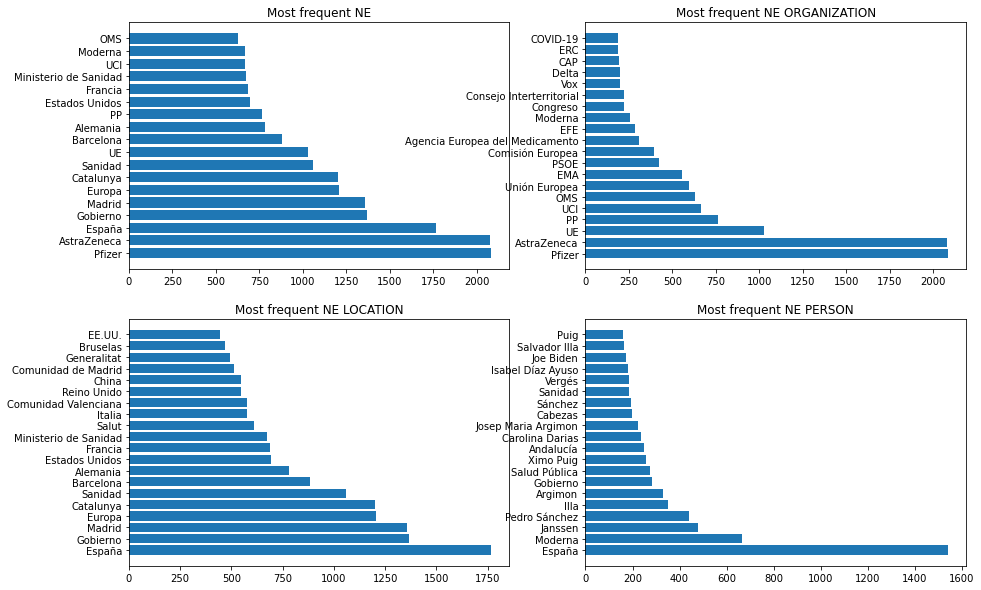

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')